## Ultimate Inc. Take Home Challenge

### Part 1: EDA
- Aggregate logins by 15min intervals
- Visualize the grouped logins
- Describe how to best characterize the underlying pattern of demand (logins)
- Report important features of the demand i.e. daily cycles
- Report any data quality issues

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import HourLocator, DayLocator
import matplotlib.dates as mdates

In [2]:
# load login data
logins = pd.read_json('logins.json')

In [50]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
195,1970-01-02 01:55:14
196,1970-01-02 01:55:28
197,1970-01-02 02:03:28
198,1970-01-02 02:02:44


### Aggregate logins by 15min intervals

In [28]:
# group the logins in 15min intervals, and 
group_logins = logins.resample('15T', on='login_time').count()

In [36]:
group_logins

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


### Visualize the grouped logins

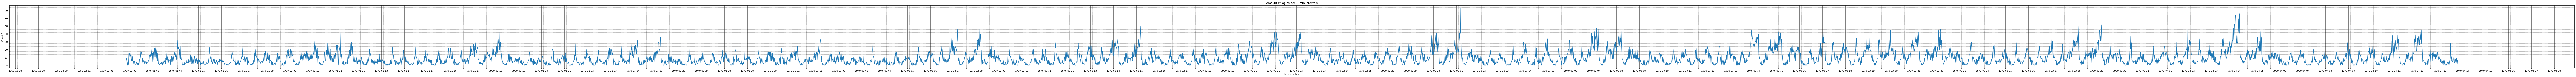

In [80]:
# visualize the logins

# figure and plot
fig, ax = plt.subplots(figsize=(200,5))
ax.plot(group_logins.index, group_logins.login_time)

# grid adjustments
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# specific ticks
ax.minorticks_on()
ax.xaxis.set_minor_locator(HourLocator(byhour=None, interval=12, tz=None))
ax.xaxis.set_major_locator(DayLocator(bymonthday=None, interval=1, tz=None))

# labels
ax.set_title('Amount of logins per 15min intervals')
ax.set_xlabel('Date and Time')
ax.set_ylabel('Count #')

# plot
_ = plt.show()

### Describe how to best characterize the underlying pattern of demand (logins)
- The underlying pattern of logins is spikes every 12 hours.

### Report important features of the demand i.e. daily cycles
- There is also a pattern of 2 days heavy login use, 5 days normal, potentially weekday/ weekend

### Report any data quality issues
- I did not find any